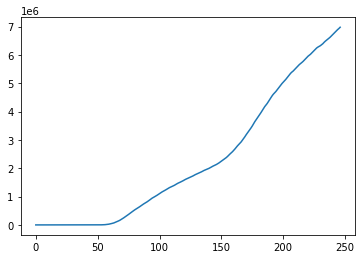

In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('usa-cases.txt', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
dataframe = pandas.read_csv('usa-cases.txt', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

165 82


In [6]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))

In [9]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.0103
Epoch 2/100
 - 1s - loss: 0.0063
Epoch 3/100
 - 1s - loss: 0.0040
Epoch 4/100
 - 1s - loss: 0.0021
Epoch 5/100
 - 1s - loss: 8.7693e-04
Epoch 6/100
 - 1s - loss: 2.4314e-04
Epoch 7/100
 - 1s - loss: 5.9326e-05
Epoch 8/100
 - 1s - loss: 2.1272e-05
Epoch 9/100
 - 1s - loss: 1.6475e-05
Epoch 10/100
 - 1s - loss: 1.5653e-05
Epoch 11/100
 - 1s - loss: 1.5522e-05
Epoch 12/100
 - 1s - loss: 1.5682e-05
Epoch 13/100
 - 1s - loss: 1.5195e-05
Epoch 14/100
 - 1s - loss: 1.5292e-05
Epoch 15/100
 - 1s - loss: 1.5654e-05
Epoch 16/100
 - 1s - loss: 1.3959e-05
Epoch 17/100
 - 1s - loss: 1.4200e-05
Epoch 18/100
 - 1s - loss: 1.4125e-05
Epoch 19/100
 - 1s - loss: 1.3131e-05
Epoch 20/100
 - 1s - loss: 1.3470e-05
Epoch 21/100
 - 1s - loss: 1.2595e-05
Epoch 22/100
 - 1s - loss: 1.3962e-05
Epoch 23/100
 - 1s - loss: 1.1594e-05
Epoch 24/100
 - 1s - loss: 1.1784e-05
Epoch 25/100
 - 1s - loss: 1.0970e-05
Epoch 26/100
 - 1s - loss: 1.0463e-05
Epoch 27/100
 - 1s - loss: 1.1019e-05

In [10]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 25279.06 RMSE
Test Score: 466551.63 RMSE


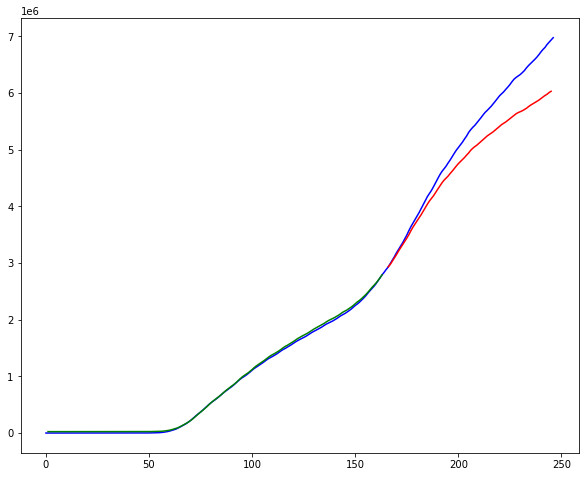

In [11]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.figure(figsize=(10,8))
plt.plot(scaler.inverse_transform(dataset),color='b')
plt.plot(trainPredictPlot,color='g')
plt.plot(testPredictPlot,color='r')
plt.show()